## Loading the dataset for loan predication

In [9]:
import pandas as pd
loan=pd.read_csv('/content/train_loan.csv')

In [10]:
#The dataset
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# DATA PREPROCESSING

In [11]:
loan.duplicated().sum() # No duplicates are present

np.int64(0)

## *Checking for missing values*

In [24]:
round(loan.isnull().mean()*100,2) # Missing values are present in most of the attributes

,0
Loan_ID,0.00
Gender,2.12
Married,0.49
Dependents,2.44
Education,0.00
Self_Employed,5.21
ApplicantIncome,0.00
CoapplicantIncome,0.00
LoanAmount,3.58
Loan_Amount_Term,2.28


## *Visualizing the dataset for more info*

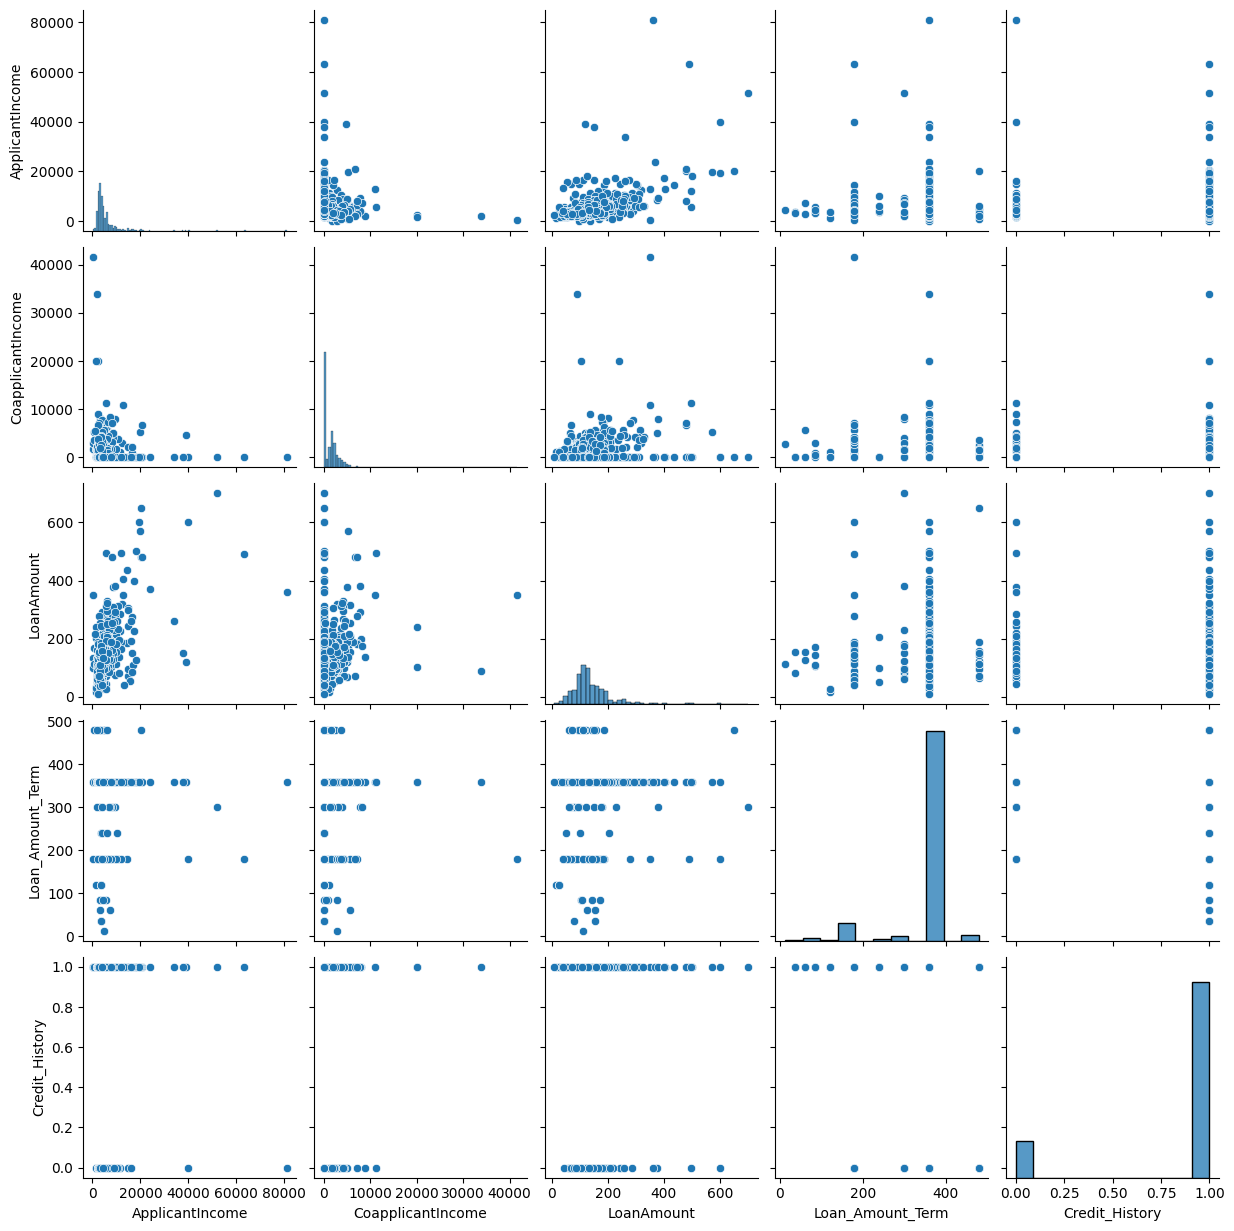

In [16]:
import seaborn as sns # Importing the seaborn library to visualize the pairplot for the dataset
sns.pairplot(loan)

In [19]:
loan.describe() # Statistical information about the dataset

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [20]:
loan.info() # A brief summary about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [22]:
numcol=loan.select_dtypes(include='number') # Extracting only the numerical columns and its values
numcol

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [23]:
numcol.skew() # Checking the skewness of the dataset
# Positive skewness represents having mean > median and negative skewness is vice-versa

,0
ApplicantIncome,6.539513
CoapplicantIncome,7.491531
LoanAmount,2.677552
Loan_Amount_Term,-2.362414
Credit_History,-1.882361


## *Handling missing values*

In [28]:
# Importing SimpleImputer to handle missing values
from sklearn.impute import SimpleImputer
catcol=loan.select_dtypes(include='object') # Extracting only the categorical columns and its values
catcol

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [32]:
# Imputing the numerical columns
numimp=SimpleImputer(strategy='median')
loan[numcol]=numimp.fit_transform(loan[numcol])

In [36]:
# Imputing the categorical columns
catimp=SimpleImputer(strategy='most_frequent')
loan[catcol]=catimp.fit_transform(loan[catcol])

In [37]:
loan.isnull().sum() # Missing values handled

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


## *Checking for outliers*

<Axes: >

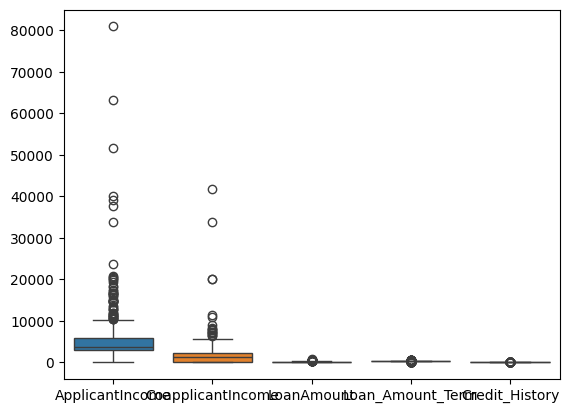

In [38]:
sns.boxplot(loan) # Outliers are detected for every column using boxplot

## *Handling the outliers*

In [39]:
# The below function is used to clip the outliers
def clip_outliers(data, col):
    for i in col:
        if data[i].dtype in ['float64', 'int64']:
            Q1 = data[i].quantile(0.25)  # 1st quartile
            Q3 = data[i].quantile(0.75)  # 3rd quartile
            IQR = Q3 - Q1 # Intermediate quartile
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            data[i] = data[i].clip(lower_bound, upper_bound) # Clipping the outliers
    return data

<Axes: >

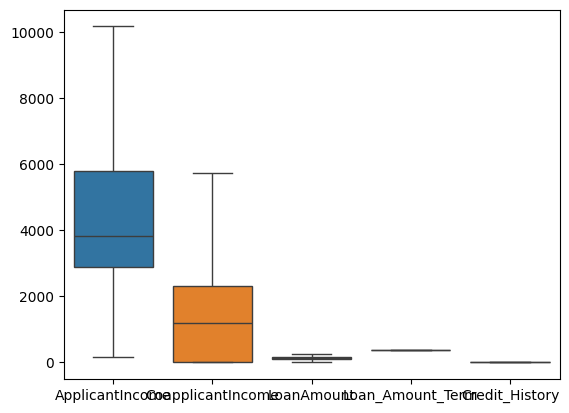

In [41]:
clip_outliers(loan,loan.columns)
sns.boxplot(loan) # Outliers handled

## *Encoding*

In [49]:
# One-hot encoding is best suitable for encoding this dataset
loan2=pd.get_dummies(loan, columns=catcol, drop_first=True, dtype=int) # Arranging  a new dataset 'loan2' for the encoding process

In [50]:
loan2 # Encoding performed

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,...,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849.0,0.0,128.0,360.0,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
1,4583.0,1508.0,128.0,360.0,1.0,1,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
2,3000.0,0.0,66.0,360.0,1.0,0,1,0,0,0,...,1,1,0,0,0,0,1,0,1,1
3,2583.0,2358.0,120.0,360.0,1.0,0,0,1,0,0,...,1,1,0,0,0,1,0,0,1,1
4,6000.0,0.0,141.0,360.0,1.0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
610,4106.0,0.0,40.0,360.0,1.0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,1
611,8072.0,240.0,253.0,360.0,1.0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,1,1
612,7583.0,0.0,187.0,360.0,1.0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,1,1


## *Scaling*

In [51]:
# Importing StandardScaler function from the sklearn library
from sklearn.preprocessing import StandardScaler
scalecols=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'] # Columns required for scaling
loan2[scalecols]=StandardScaler().fit_transform(loan2[scalecols]) # Executing the scaling process

In [52]:
loan2 # Scaling performed

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,...,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0.497164,-0.874587,-0.168041,360.0,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
1,-0.013767,0.054395,-0.168041,360.0,1.0,1,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
2,-0.652632,-0.874587,-1.280462,360.0,1.0,0,1,0,0,0,...,1,1,0,0,0,0,1,0,1,1
3,-0.820924,0.578025,-0.311579,360.0,1.0,0,0,1,0,0,...,1,1,0,0,0,1,0,0,1,1
4,0.558104,-0.874587,0.065209,360.0,1.0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.692990,-0.874587,-1.190750,360.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
610,-0.206274,-0.874587,-1.746961,360.0,1.0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,1
611,1.394319,-0.726739,2.074743,360.0,1.0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,1,1
612,1.196969,-0.874587,0.890553,360.0,1.0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,1,1
